In [2]:
import pandas as pd    
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from matplotlib import colors
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_excel(r"C:\Users\kumar\Downloads\Book1.xlsx")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [4]:
df['income']=df['Income'].values.reshape(-1,1)
df['income']

0       58138.0
1       46344.0
2       71613.0
3       26646.0
4       58293.0
         ...   
2235    61223.0
2236    64014.0
2237    56981.0
2238    69245.0
2239    52869.0
Name: income, Length: 2240, dtype: float64

In [27]:
from sklearn.impute import SimpleImputer
income_values = df['Income'].values.reshape(-1, 1)
si = SimpleImputer(missing_values=np.nan, strategy='mean')
si.fit(income_values)
df['Income'] = si.transform(income_values)

In [28]:
df.isnull().sum()

Education              0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
Wines                  0
Fruits                 0
Meat                   0
Fish                   0
Sweets                 0
Gold                   0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
income                 0
customerfor            0
Age                    0
Spent                  0
Living_With            0
Children               0
Family_Size            0
Is_Parent              0
dtype: int64

In [7]:
df['Dt_Customer']=pd.to_datetime(df["Dt_Customer"])
dates=[]
for i in df['Dt_Customer']:
    i=i.date()
    dates.append(i)
print("the new customer enrollments date:",max(dates))    
print("the old customer enrollments date:",min(dates))    

the new customer enrollments date: 2014-06-29
the old customer enrollments date: 2012-07-30


In [8]:
days=[]
d1=max(dates)
for i in dates:
    delta=d1-i
    days.append(delta)
df['customerfor']=days
df['customerfor']=pd.to_numeric(df['customerfor'],errors='coerce')


In [9]:
print("total number in each category in marital status:\n",df['Marital_Status'].value_counts())
print("total number in each category in education:\n",df['Education'].value_counts())

total number in each category in marital status:
 Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64
total number in each category in education:
 Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64


In [10]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'income', 'customerfor'],
      dtype='object')

Extract the "Age" of a customer by the "Year_Birth" indicating the birth year of the respective person.
Create another feature "Spent" indicating the total amount spent by the customer in various categories over the span of two years.
Create another feature "Living_With" out of "Marital_Status" to extract the living situation of couples.
Create a feature "Children" to indicate total children in a household that is, kids and teenagers.
To get further clarity of household, Creating feature indicating "Family_Size"
Create a feature "Is_Parent" to indicate parenthood status
Lastly, I will create three categories in the "Education" by simplifying its value counts.
Dropping some of the redundant features

In [11]:
df["Age"] = 2023-df["Year_Birth"]
df["Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]
df["Living_With"]=df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})
df["Children"]=df["Kidhome"]+df["Teenhome"]
df["Family_Size"] = df["Living_With"].replace({"Alone": 1, "Partner":2})+ df["Children"]
df["Is_Parent"] = np.where(df.Children> 0, 1, 0)
df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})
df=df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

In [12]:
df=df.drop(['ID','Marital_Status','Year_Birth','Z_Revenue','Z_CostContact','Dt_Customer'],axis=1)

In [13]:
df.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp2,Complain,Response,income,customerfor,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,...,0.013393,0.009375,0.149107,52247.251354,3.054950e+16,54.194196,605.798214,0.950446,2.595089,0.715179
std,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,...,0.114976,0.096391,0.356274,25037.797168,1.746339e+16,11.984069,602.249288,0.751803,0.906959,0.451430
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1730.000000,0.000000e+00,27.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,35538.750000,1.561680e+16,46.000000,68.750000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,...,0.000000,0.000000,0.000000,51741.500000,3.071520e+16,53.000000,396.000000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,68289.750000,4.570560e+16,64.000000,1045.500000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,...,1.000000,1.000000,1.000000,666666.000000,6.039360e+16,130.000000,2525.000000,3.000000,5.000000,1.000000


In [14]:
df

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,Complain,Response,income,customerfor,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,0,1,58138.0,57283200000000000,66,1617,Alone,0,1,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,0,0,46344.0,9763200000000000,69,27,Alone,2,3,1
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,0,0,71613.0,26956800000000000,58,776,Partner,0,2,0
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,0,0,26646.0,12009600000000000,39,53,Partner,1,3,1
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,0,0,58293.0,13910400000000000,42,422,Partner,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,61223.0,0,1,46,709,43,182,42,118,...,0,0,61223.0,32918400000000000,56,1341,Partner,1,3,1
2236,Postgraduate,64014.0,2,1,56,406,0,30,0,0,...,0,0,64014.0,1641600000000000,77,444,Partner,3,5,1
2237,Graduate,56981.0,0,0,91,908,48,217,32,12,...,0,0,56981.0,13392000000000000,42,1241,Alone,0,1,0
2238,Postgraduate,69245.0,0,1,8,428,30,214,80,30,...,0,0,69245.0,13478400000000000,67,843,Partner,1,3,1


<Figure size 800x550 with 0 Axes>

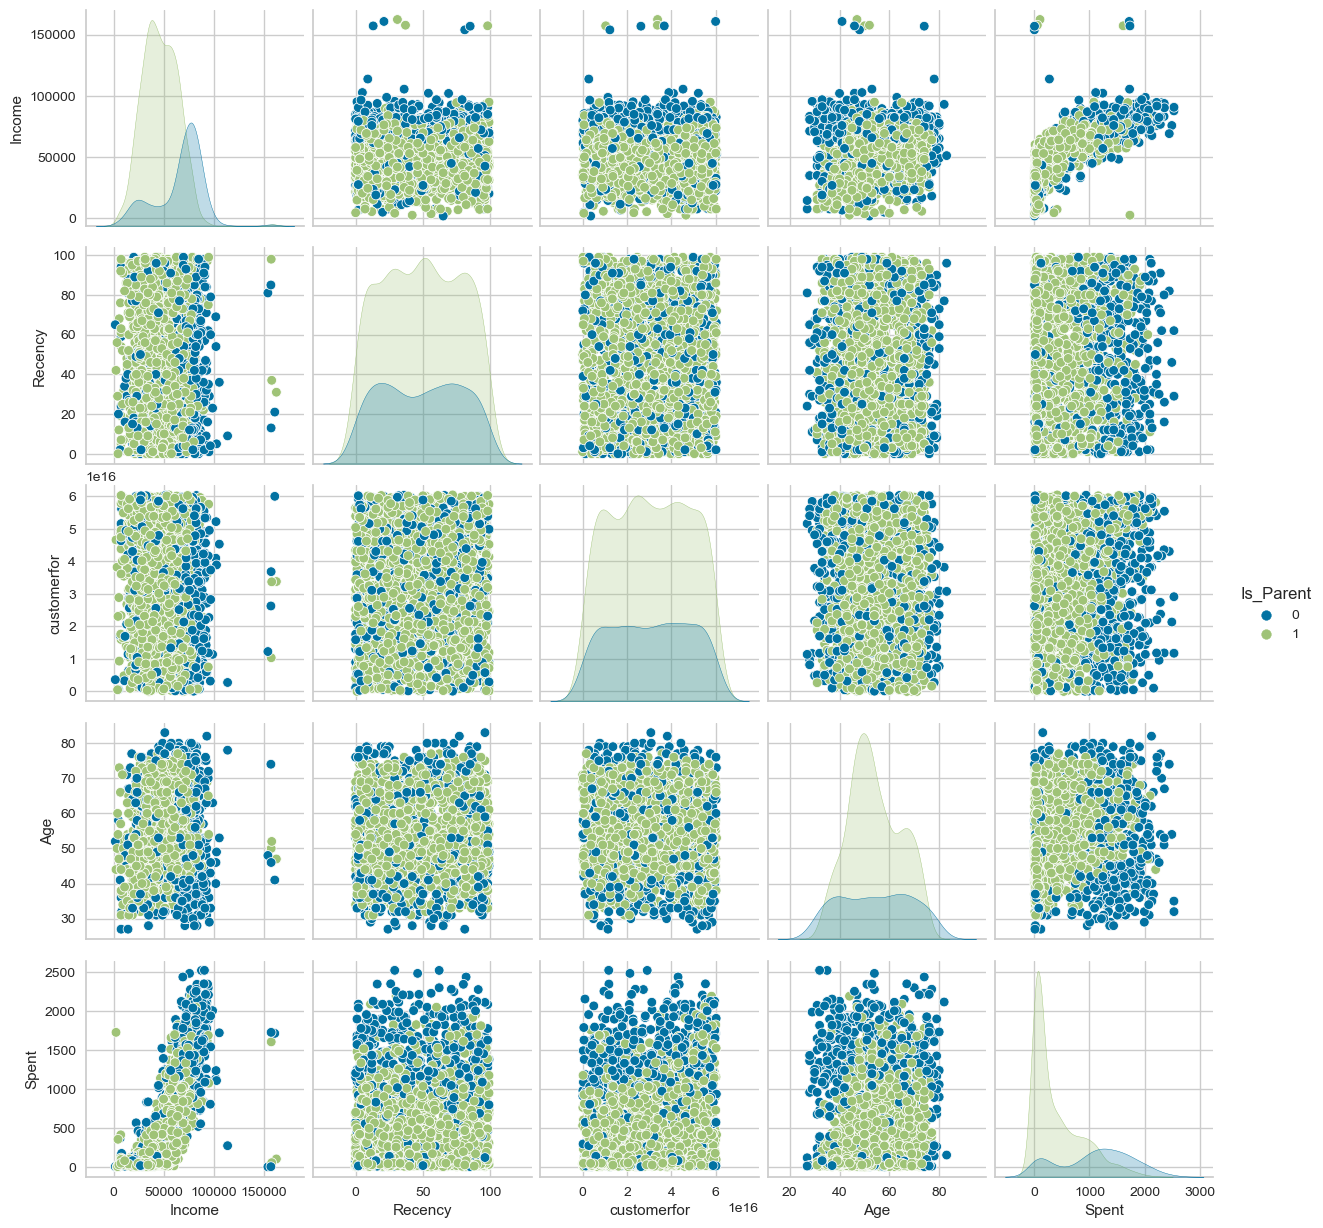

In [26]:
data=['Income','Recency','customerfor','Age','Spent','Is_Parent']
plt.figure()
sns.pairplot(df[data],hue='Is_Parent')
plt.show()

In [25]:
df=df[(df['Age']<90)]
df=df[(df['Income']<600000)]
df.shape

(2212, 24)

<Axes: >

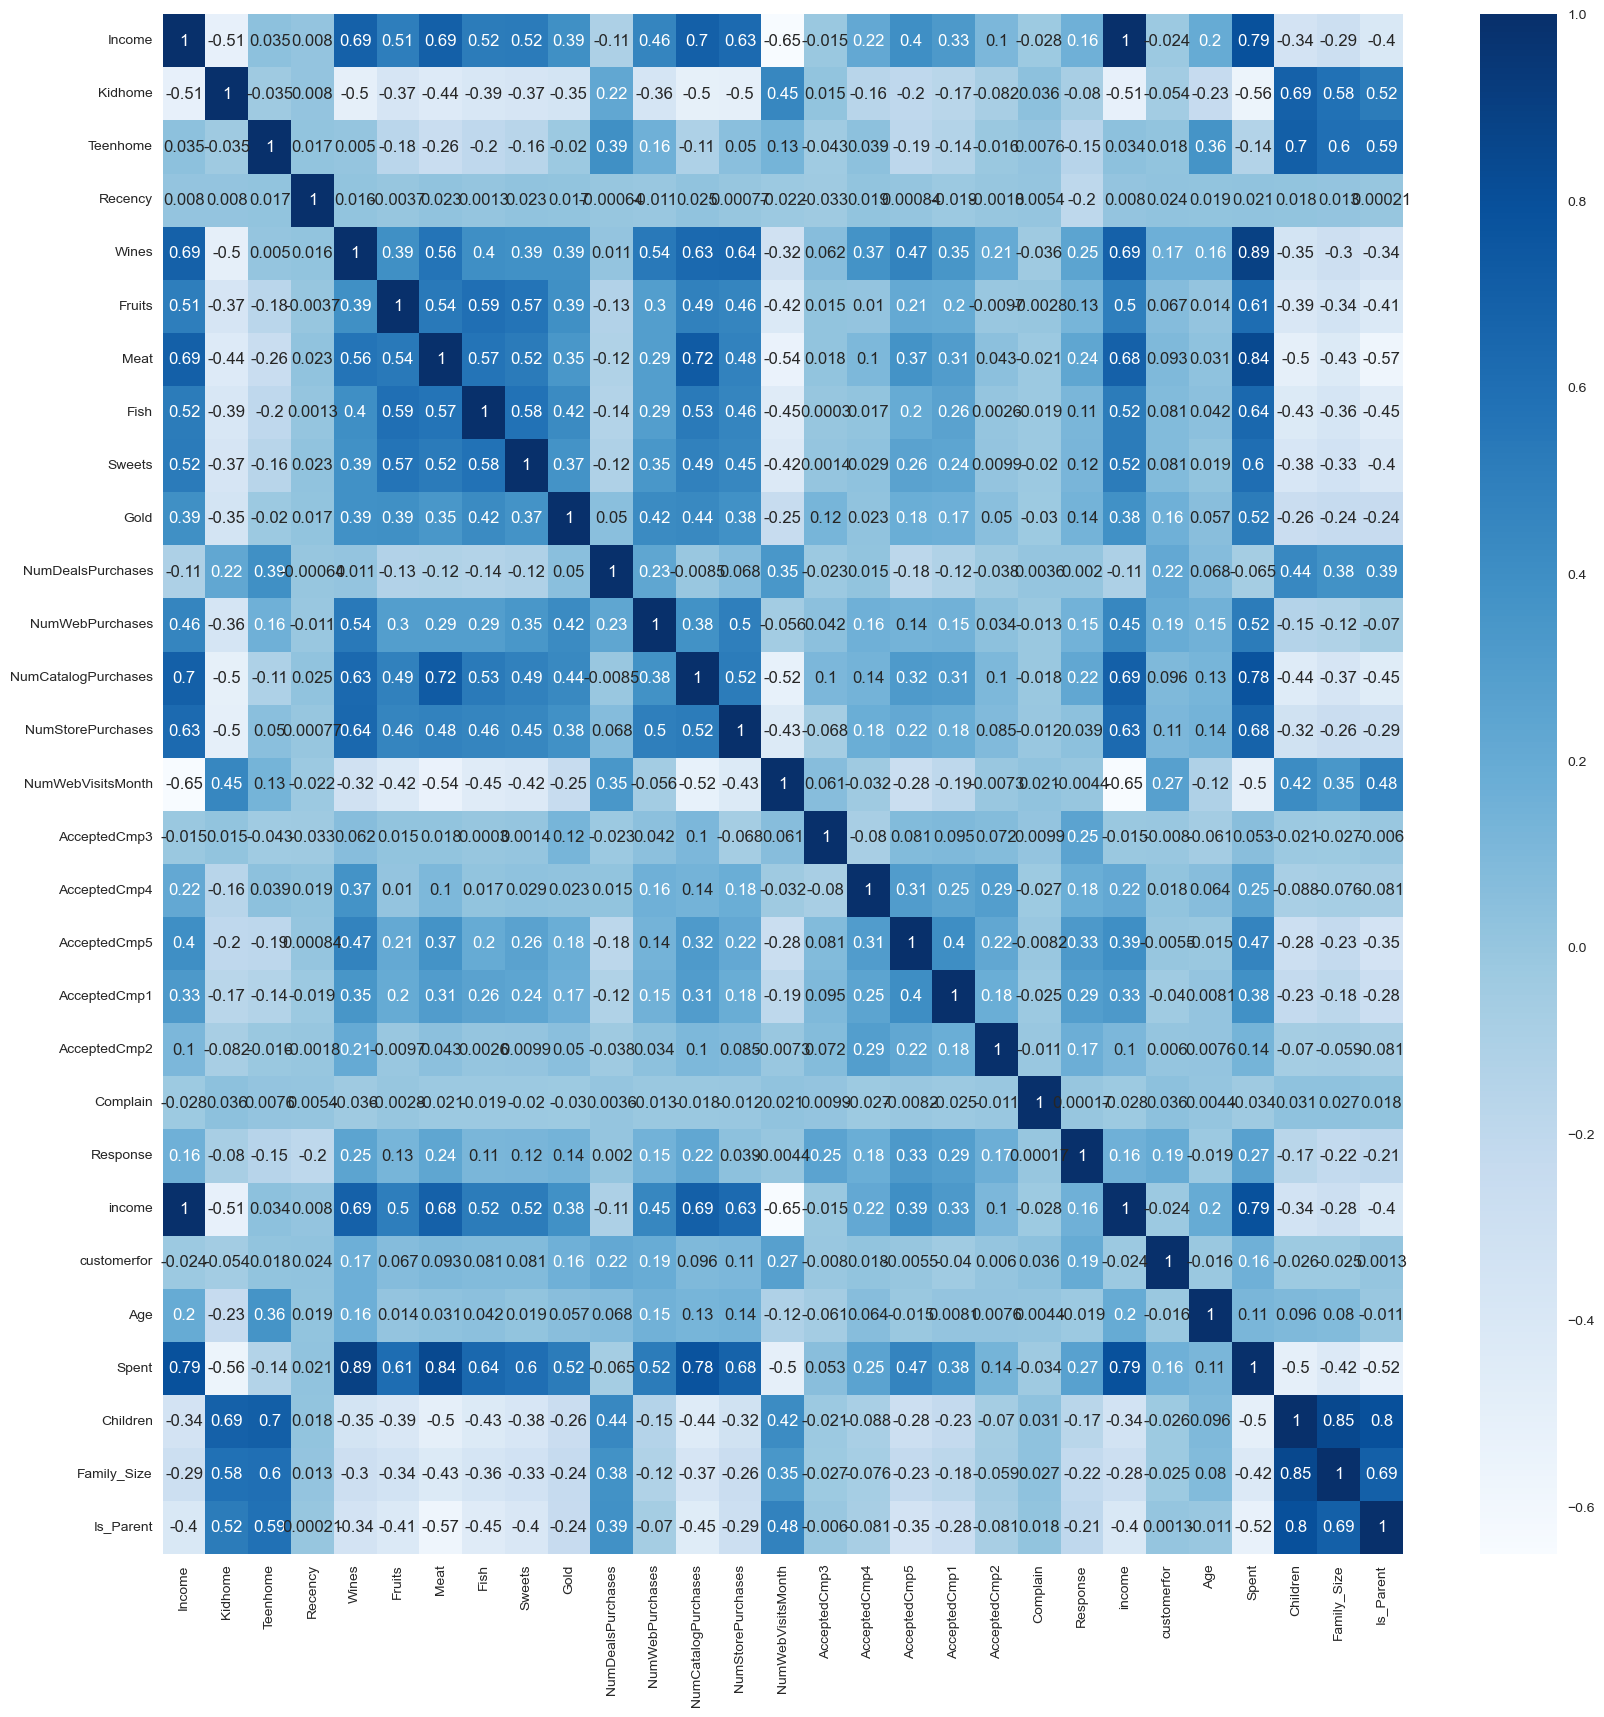

In [17]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

In [18]:
labelencoder=LabelEncoder()
df['Education']=labelencoder.fit_transform(df['Education'])
df['Living_With']=labelencoder.fit_transform(df['Living_With'])
df

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,Complain,Response,income,customerfor,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,0,58138.0,0,0,58,635,88,546,172,88,...,0,1,58138.0,57283200000000000,66,1617,0,0,1,0
1,0,46344.0,1,1,38,11,1,6,2,1,...,0,0,46344.0,9763200000000000,69,27,0,2,3,1
2,0,71613.0,0,0,26,426,49,127,111,21,...,0,0,71613.0,26956800000000000,58,776,1,0,2,0
3,0,26646.0,1,0,26,11,4,20,10,3,...,0,0,26646.0,12009600000000000,39,53,1,1,3,1
4,1,58293.0,1,0,94,173,43,118,46,27,...,0,0,58293.0,13910400000000000,42,422,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,61223.0,0,1,46,709,43,182,42,118,...,0,0,61223.0,32918400000000000,56,1341,1,1,3,1
2236,1,64014.0,2,1,56,406,0,30,0,0,...,0,0,64014.0,1641600000000000,77,444,1,3,5,1
2237,0,56981.0,0,0,91,908,48,217,32,12,...,0,0,56981.0,13392000000000000,42,1241,0,0,1,0
2238,1,69245.0,0,1,8,428,30,214,80,30,...,0,0,69245.0,13478400000000000,67,843,1,1,3,1


In [19]:
df=df.drop(['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response'],axis=1)
df

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumStorePurchases,NumWebVisitsMonth,income,customerfor,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,0,58138.0,0,0,58,635,88,546,172,88,...,4,7,58138.0,57283200000000000,66,1617,0,0,1,0
1,0,46344.0,1,1,38,11,1,6,2,1,...,2,5,46344.0,9763200000000000,69,27,0,2,3,1
2,0,71613.0,0,0,26,426,49,127,111,21,...,10,4,71613.0,26956800000000000,58,776,1,0,2,0
3,0,26646.0,1,0,26,11,4,20,10,3,...,4,6,26646.0,12009600000000000,39,53,1,1,3,1
4,1,58293.0,1,0,94,173,43,118,46,27,...,6,5,58293.0,13910400000000000,42,422,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,61223.0,0,1,46,709,43,182,42,118,...,4,5,61223.0,32918400000000000,56,1341,1,1,3,1
2236,1,64014.0,2,1,56,406,0,30,0,0,...,5,7,64014.0,1641600000000000,77,444,1,3,5,1
2237,0,56981.0,0,0,91,908,48,217,32,12,...,13,6,56981.0,13392000000000000,42,1241,0,0,1,0
2238,1,69245.0,0,1,8,428,30,214,80,30,...,10,3,69245.0,13478400000000000,67,843,1,1,3,1


In [22]:
scaler = StandardScaler()
scaler.fit(df)
scaled_df = pd.DataFrame(scaler.transform(df),columns= df.columns )
print("All features are now scaled")

All features are now scaled


In [33]:
scaled_df.isnull().sum()

Education               0
Income                 24
Kidhome                 0
Teenhome                0
Recency                 0
Wines                   0
Fruits                  0
Meat                    0
Fish                    0
Sweets                  0
Gold                    0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
income                  0
customerfor             0
Age                     0
Spent                   0
Living_With             0
Children                0
Family_Size             0
Is_Parent               0
dtype: int64

In [29]:
pca=PCA(n_components=3)
pca.fit(df)
pca_df=pd.DataFrame(pca.transform(df),columns=(['col1','col2','col3']))
pca_df.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,-1.070524e+00,1.749556e+16,-2.983269e+16,-1.514469e+16,-1.974857e+14,1.500891e+16,3.056091e+16
col2,2212.0,-3.578771e-12,3.044069e+04,-7.214522e+04,-2.372088e+04,-8.100656e+02,2.355093e+04,1.562793e+05
col3,2212.0,-9.456771e-14,4.137880e+02,-2.328444e+03,-2.245328e+02,3.361996e+01,2.537244e+02,3.444749e+03


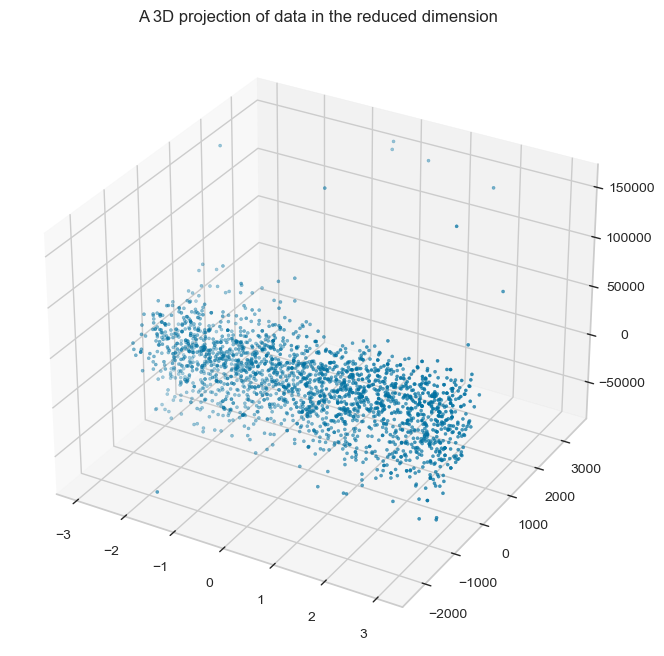

In [34]:
x=pca_df['col1']
y=pca_df['col3']
z=pca_df['col2']
fig=plt.figure(figsize=(15,8))
px=fig.add_subplot(111,projection='3d')
px.scatter(x,y,z,marker='.')
px.set_title('A 3D projection of data in the reduced dimension')
plt.show()

Elbow Method to determine the number of clusters to be formed:


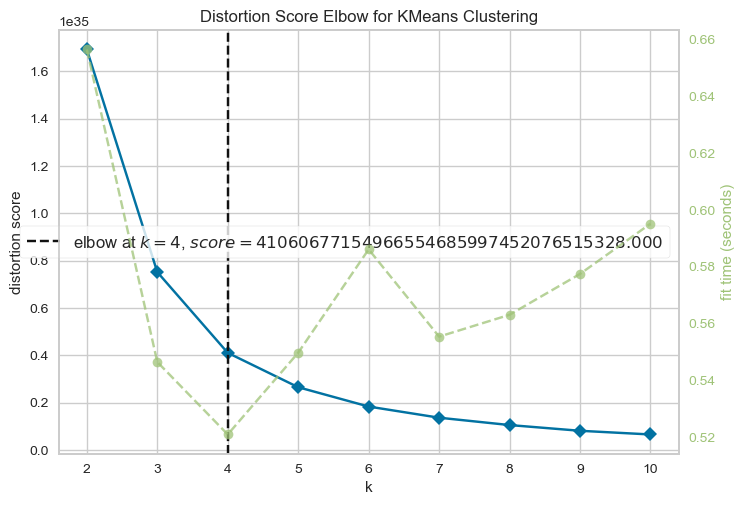

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [35]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), n_init=8)
Elbow_M.fit(pca_df)
Elbow_M.show()

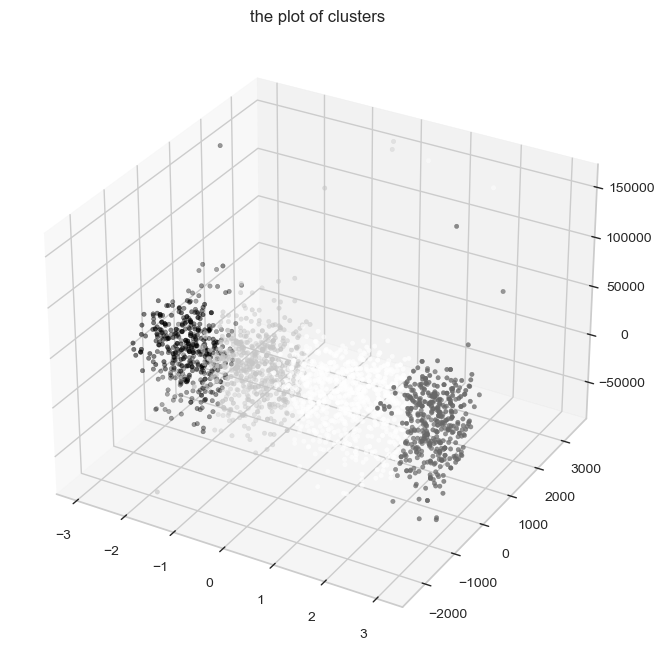

In [36]:
ac=AgglomerativeClustering(n_clusters=4)
acn=ac.fit_predict(pca_df)
pca_df['clusters']=acn
df['clusters']=acn
fig=plt.figure(figsize=(15,8))
px=plt.subplot(111,projection='3d',label='bla')
px.scatter(x,y,z,s=40,c=pca_df['clusters'],marker='.')
px.set_title('the plot of clusters')
plt.show()

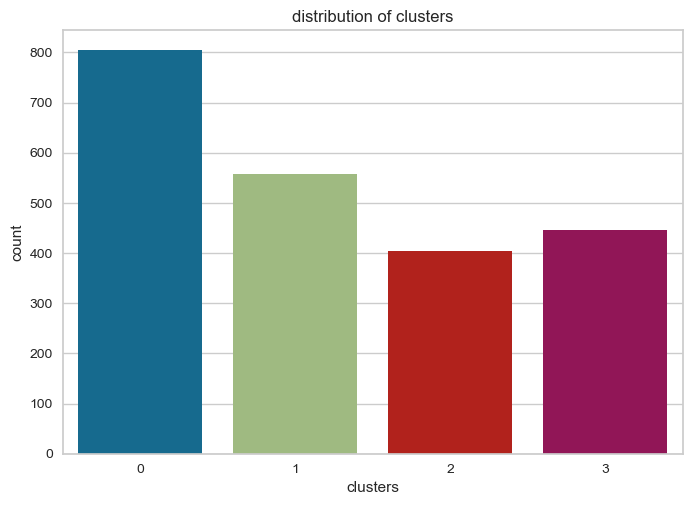

In [37]:
pl=sns.countplot(x=df['clusters'])
pl.set_title("distribution of clusters")
plt.show()